<a href="https://colab.research.google.com/github/imYours14/PCVK_Genap_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

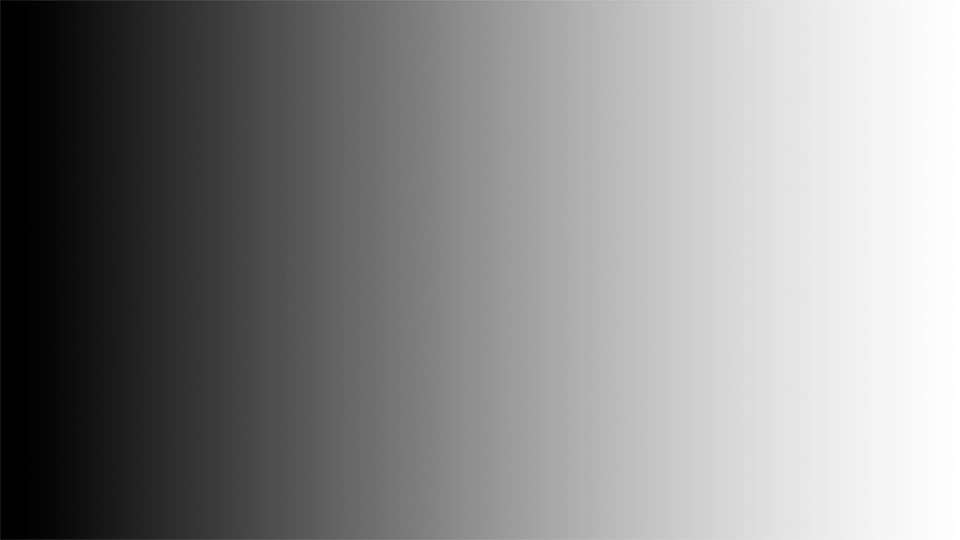

In [58]:
img = cv.imread('/content/drive/MyDrive/PCVK/Week10/Image/gradient.jpg')
cv2_imshow(img)

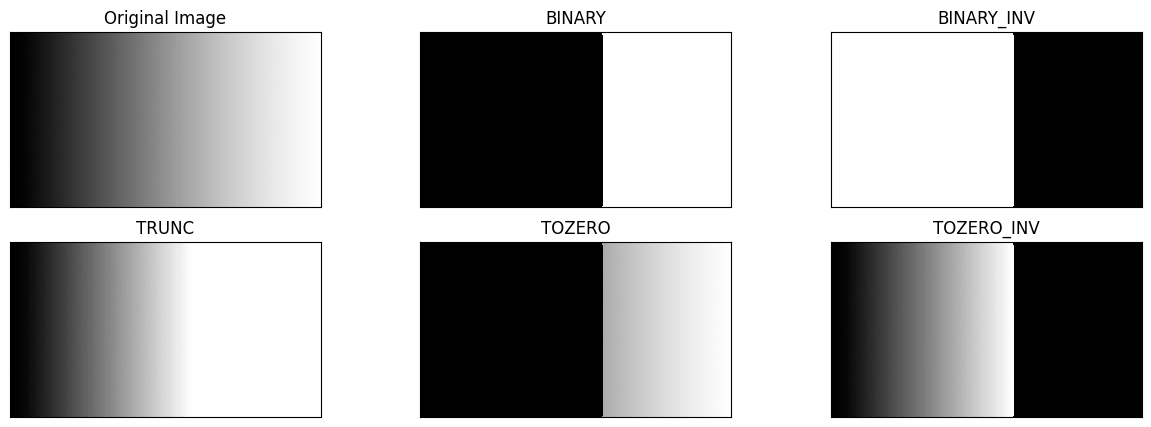

In [59]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
thresh = 170

# membuat citra hasil pengolahan dengan ukuran yang sama seperti citra asli
binary = np.zeros_like(img_gray)
binary_inv = np.zeros_like(img_gray)
trunc = np.zeros_like(img_gray)
tozero = np.zeros_like(img_gray)
tozero_inv = np.zeros_like(img_gray)

# melakukan operasi threshold secara manual
for i in range(img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
        # BINARY
        if img_gray[i][j] > thresh:
            binary[i][j] = 255
        else:
            binary[i][j] = 0
            
        # BINARY_INV
        if img_gray[i][j] > thresh:
            binary_inv[i][j] = 0
        else:
            binary_inv[i][j] = 255
            
        # TRUNC
        if img_gray[i][j] > thresh:
            trunc[i][j] = thresh
        else:
            trunc[i][j] = img_gray[i][j]
            
        # TOZERO
        if img_gray[i][j] > thresh:
            tozero[i][j] = img_gray[i][j]
        else:
            tozero[i][j] = 0
            
        # TOZERO_INV
        if img_gray[i][j] > thresh:
            tozero_inv[i][j] = 0
        else:
            tozero_inv[i][j] = img_gray[i][j]

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, binary, binary_inv, trunc, tozero, tozero_inv]
plt.figure(figsize = (15,5))

for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

In [61]:
img = cv.imread('/content/drive/MyDrive/PCVK/Week10/Image/balon.jpg',0)
import cv2 as cv

<ipython-input-62-8977854dcd88>:17: RuntimeWarning: invalid value encountered in true_divide
  mb = sumb / wb


<Figure size 1500x500 with 0 Axes>

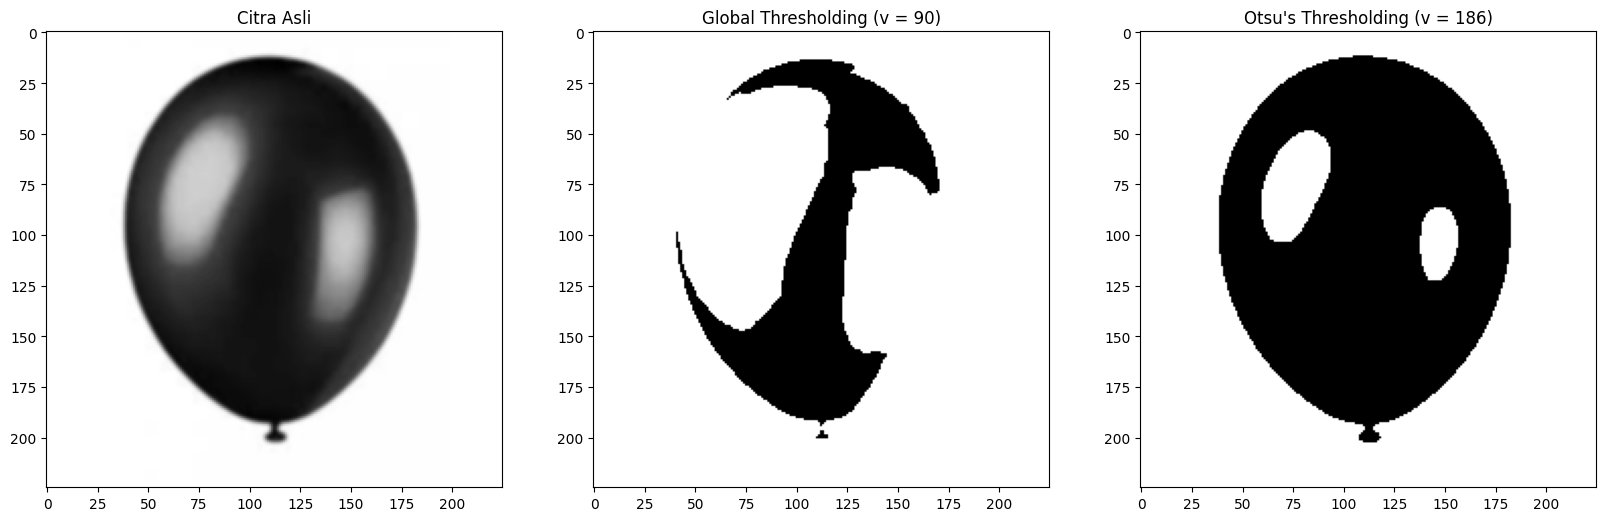

In [62]:
# menghitung nilai threshold menggunakan Otsu Thresholding secara manual
balon_gray = cv. GaussianBlur (img, (5,5),0)

histogrm = cv.calcHist([balon_gray],[0],None,[256], [0,256]) 
hist_norm = histogrm.ravel()/histogrm.max() 
Q = hist_norm.cumsum() 
bins = np.arange (256) 
wb = 0 
sumb = 0 
variationmax = 0 
fn_min = np.inf 
thresh = -1 
for i in range(0,187):
  wb += histogrm[i] 
  wf = (balon_gray.shape[0]*balon_gray.shape[1]) - wb 
  sumb += (i*histogrm[i]) 
  mb = sumb / wb 
  mf = (sumb - sumb)/wf 
  varbetween = wb * wf * (mb - mf) * (mb - mf) 
  if (varbetween>variationmax):
    variationmax = varbetween
    thresh = i 
x = ("Otsu's Thresholding (v = ")+str(thresh)+")" 
ret, th1 = cv.threshold(balon_gray, 90, 255, cv.THRESH_BINARY)
ret, th2 = cv.threshold (balon_gray, thresh, 255, cv. THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x] 
citra3 = [balon_gray, th1, th2]
plt.figure(figsize = (15,5))

plt. figure(figsize = (20,15)) 
for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray') 
    plt.title(titles[i])

plt.show()

In [67]:
img = cv.imread('/content/drive/MyDrive/PCVK/Week10/Image/tobacco.png')
import cv2 as cv

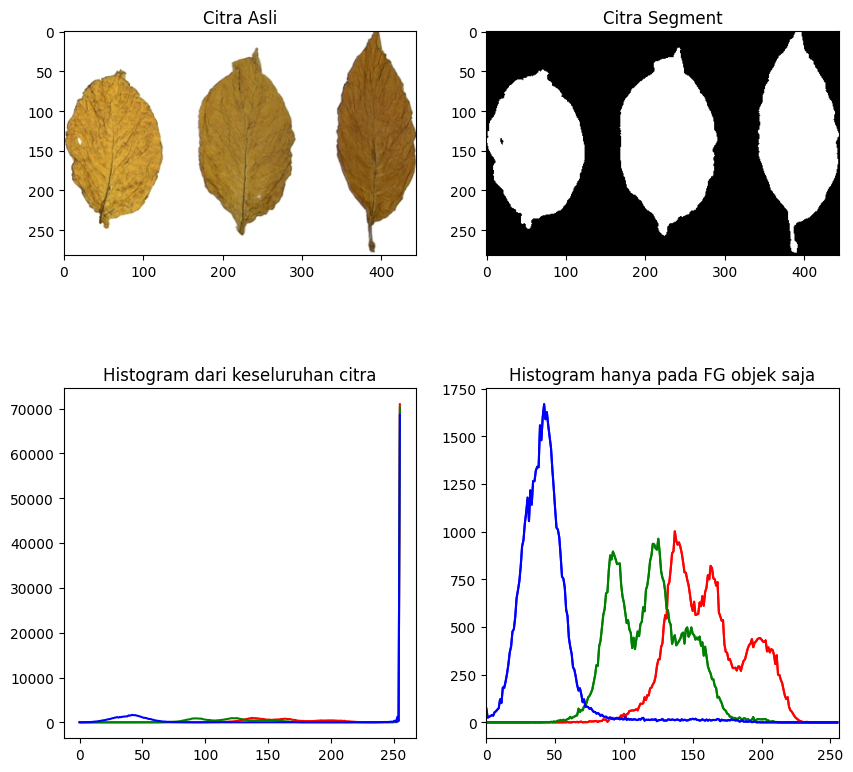

In [68]:
img = cv.cvtColor(img,cv.COLOR_BGR2RGB) 
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10)) 
plt.subplot(2,2,1),plt.imshow(img) 
plt.title('Citra Asli') 
plt.subplot(2,2,2),plt.imshow(mask, 'gray') 
plt.title('Citra Segment') 
color = ('r','g','b') 
for i,col in enumerate(color):
    hist0 = cv.calcHist([img],[i],None,[256],[0,256]) 
    plt.subplot(2,2,3),plt.plot(hist0,color = col) 
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col) 
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256]) 
plt.show()

In [69]:
img = cv.imread('/content/drive/MyDrive/PCVK/Week10/Image/peppers.jpg')
import cv2 as cv

Text(0.5, 1.0, 'Yellow Segmented\xa0Image')

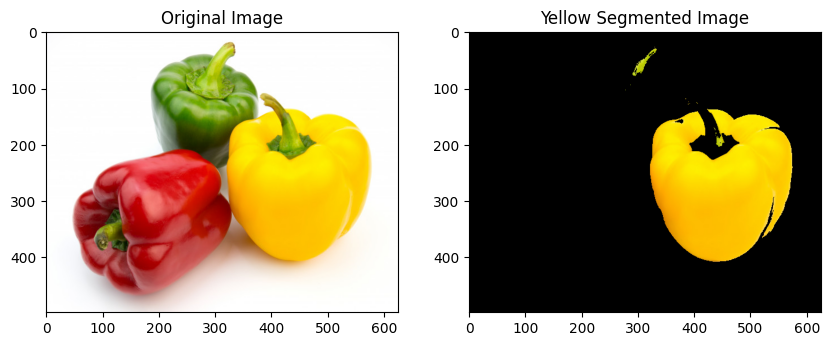

In [70]:
# Konversi warna dari BGR ke RGB
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Konversi gambar ke tipe data float32 untuk K-Means
img_float = np.float32(img_rgb.reshape((-1, 3)))

# Definisikan parameter K-Means
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
attempts = 10
flags = cv.KMEANS_RANDOM_CENTERS

# Menjalankan K-Means
ret, label, center = cv.kmeans(img_float, K, None, criteria, attempts, flags)

# Mengubah tipe data kembali ke uint8 dan reshape ke ukuran gambar asli
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img_rgb.shape))

# Mengambil piksel warna kuning saja
hsv = cv.cvtColor(res2, cv.COLOR_RGB2HSV)
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])
mask = cv.inRange(hsv, lower_yellow, upper_yellow)

# Menggabungkan mask dan gambar asli
result = cv.bitwise_and(img_rgb, img_rgb, mask=mask)

# Menampilkan gambar
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Original Image')
plt.subplot(2,2,2),plt.imshow(result)
plt.title('Yellow Segmented Image')